In [5]:
# some imports you may need
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}

In [2]:
#spells to check
#staff adds 200, rapier adds 170

LV = np.arange(1, 101, 1); staff = 200; rapier = 170     #level range as applicable to bonus stats

RDMwil = 7; RDMstr = 8; BLU = 8; WHM = 9; BLM = 10       #relevant starting stats

wilmod3 = 3; wilmod2 = 2; strmod2 = 2; bonusmod5 = 5; bonusmod4 = 4

In [3]:
#calculating the stat values for the relevant classes
#one with no bonus points and one with all bonus points placed in

BLM_stats = LV * wilmod3 + BLM
BLM_stats_all = LV * bonusmod5 + BLM

WHM_stats = LV * wilmod3 + WHM
WHM_stats_all = LV * bonusmod5 + WHM

BLU_stats = LV * wilmod3 + BLU
BLU_stats_all = LV * bonusmod5 + BLU

RDM_stats_MAG = LV * wilmod3 + RDMwil
RDM_stats_all_MAG = LV * bonusmod5 + RDMwil
RDM_stats_STR = LV * wilmod3 + RDMstr
RDM_stats_all_STR = LV * bonusmod5 + RDMstr

Max damage for Nuke ranges from 2230 to 7200
Max damage for BLM Tier 3 ranges from 657 to 2142


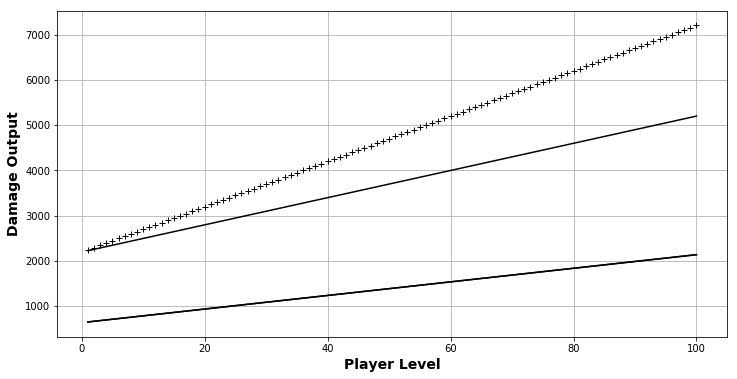

In [29]:
#Black Mage Spells
Nuke = (BLM_stats + 200)*10 + 100
NukeMax = (BLM_stats_all + 200)*10 + 100
Tier3BLM = (BLM_stats + 200)*3 + 12
Tier3BLM = (BLM_stats_all + 200)*3 + 12
plt.plot(LV, Tier3, 'k-')
plt.plot(LV, Tier3, 'k')
plt.plot(LV, Nuke, 'k')
plt.plot(LV, NukeMax, 'k+')
plt.xlabel('Player Level')
plt.ylabel('Damage Output')
plt.grid()
print('Max damage for Nuke ranges from {} to {}'.format(Nuke[0], NukeMax[99]))
print('Max damage for BLM Tier 3 ranges from {} to {}'.format(Tier3BLM[0], Tier3BLM[99]))

Max damage for White ranges from 1332 to 4314


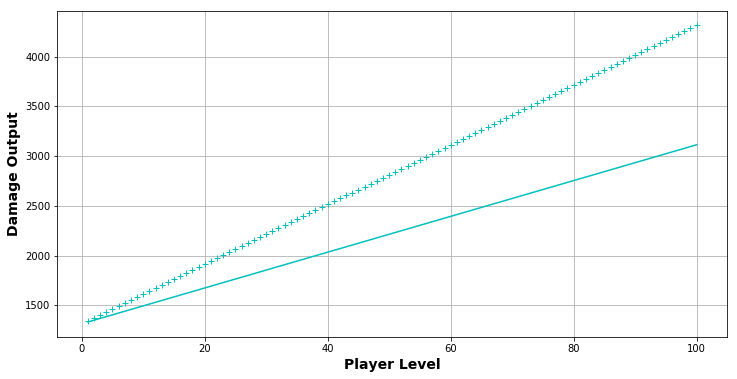

In [30]:
# White mage spells
White = (WHM_stats + 200)*6 + 60
WhiteMax = (WHM_stats_all + 200)*6 + 60
plt.plot(LV, White, 'c')
plt.plot(LV, WhiteMax, 'c+')
plt.xlabel('Player Level')
plt.ylabel('Damage Output')
plt.grid()
print('Max damage for White ranges from {} to {}'.format(White[0], WhiteMax[99]))

Max damage for Pearl ranges from 1537 to 5016
Max damage for BLU Tier 3 ranges from 651 to 2136


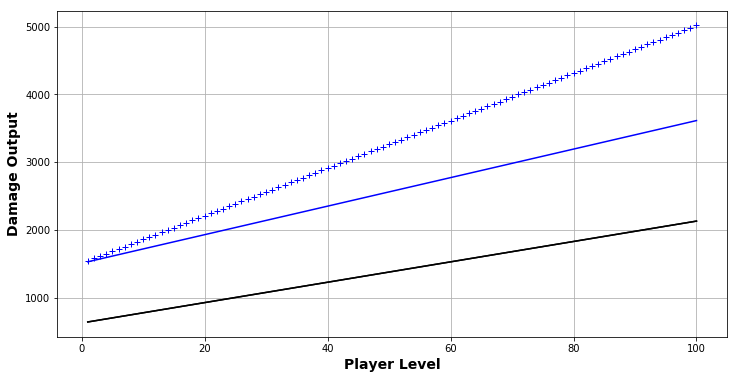

In [31]:
Pearl = (BLU_stats + 200)*7 + 60
PearlMax = (BLU_stats_all + 200)*7 + 60
Tier3BLU = (BLU_stats + 200)*3 + 12
Tier3BLU = (BLU_stats_all + 200)*3 + 12
plt.plot(LV, Tier3BLU, 'k-')
plt.plot(LV, Tier3BLU, 'k')
plt.plot(LV, Pearl, 'b')
plt.plot(LV, PearlMax, 'b+')
plt.xlabel('Player Level')
plt.ylabel('Damage Output')
plt.grid()
print('Max damage for Pearl ranges from {} to {}'.format(Pearl[0], PearlMax[99]))
print('Max damage for BLU Tier 3 ranges from {} to {}'.format(Tier3BLU[0], Tier3BLU[99]))

Max damage for Vermillion Impact ranges from 1083 to 3465
Max damage for RDM Tier 3 ranges from 558 to 2043


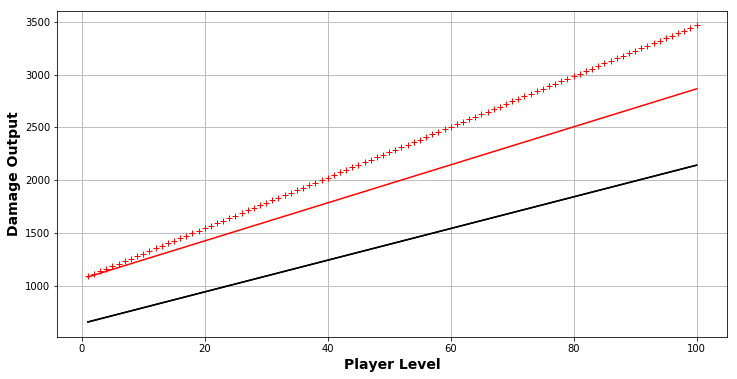

In [32]:
Vermy = (RDM_stats_MAG + 170)*3 + (RDM_stats_STR + 170)*3
VermyMax = (RDM_stats_all_MAG + 170)*3 + (RDM_stats_STR + 170)*3
Tier3RDM = (RDM_stats_MAG + 170)*3 + 12
Tier3RDM = (RDM_stats_all_MAG + 170)*3 + 12
plt.plot(LV, Tier3, 'k-')
plt.plot(LV, Tier3, 'k')
plt.plot(LV, Vermy, 'r')
plt.plot(LV, VermyMax, 'r+')
plt.xlabel('Player Level')
plt.ylabel('Damage Output')
plt.grid()
print('Max damage for Vermillion Impact ranges from {} to {}'.format(Vermy[0], VermyMax[99]))
print('Max damage for RDM Tier 3 ranges from {} to {}'.format(Tier3RDM[0], Tier3RDM[99]))